# Risk Sharing and Moral Hazard

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import scipy.stats as ss


In [8]:
alpha = 0.5

def u(c, alpha=alpha):
    return (1/alpha)*c**alpha

def E(x,p):
    return p*x[1] + (1-p)*x[0]

def EU(c, p):
    '''Expected utility  sum p_i*u(c_i)'''
    return p*u(c[1]) + (1-p)*u(c[0])
    #return np.sum(np.dot(p, u(np.array(c))) )

def budgetc(c0, p, x):
    return E(x,p)/p - ((1-p)/p)*c0

def indif(c0, p, ubar):
    return (alpha*(ubar-(1-p)*u(c0))/p)**(1/alpha)

def IC(c0,p,q,B):
    '''return plottable incentive compatibility line.
       Only works for 2 outcomes'''
    return (alpha*(u(c0)+B/(p-q)))**(1/alpha)

In [17]:
budgetc(np.array([10,20,30]), 0.8, [0,100])

array([97.5, 95. , 92.5])

In [9]:
def Bopt(p,x):
    '''Bank profit maximum'''
    return (alpha*EU(x,p))**(1/alpha)

def Copt(p,x):
    '''Consumer utility maximum'''
    return E(x,p)
    

# Risk-sharing review


### A simple employment contract

An employer hires a worker to perform a task that has a stochastic outcome.  The project can either:
- Succeed and yield $X_1$ with probability $p$ 
- Fail and yield $X_0 < X_1$ with probability $1-p$ 

There are two states of the world labeled $s$ and $f$.  The expected return from the project is denoted: 
$$
E(X|p) = p \cdot X_1 + (1-p) \cdot X_0
$$

For now we take the worker's labor effort to be contractible, and the probabilty of success $p$ to be exogenously determined by the characteristics of the project.

**Example:** $X_0 = 0, X_1 = 200, \text{ and } (p_0, p_1) = (0.2, 0.8) \text{ and hence } E(X|p) = 0.8 \cdot 100 + 0.2 \cdot 0 = 80 $

In [10]:
X = [0, 100]
p = 0.8
print(f'E(X|p) = {E(X, p)}')

E(X|p) = 80.0


## Risk neutral employer and risk-averse agent

The Contract design problem is how to allocate claims to the stochastic returns generated by the project between:

- Principal (Employer):  $(X_s-c_s, X_f-c_f)$ 
- Agent (worker):  $(c_s, c_f)$

### Competitive Contracts

When principals compete for agents the most favorable contract will be offered to the agent.  The terms of this contract can be determined by maximizing the agent's von-Neumann-Morgenstern expected utility subject to the principal's participation constraint. In other words:

$$
\max_{c_s, c_f} Eu(c|p) = p u(c_s) + (1-p) u(c_f)
$$

subject to

$$
E(X|p)- E(c|p) \ge R
$$

where $R$ equals the opportunity cost of any of the principal's resources that will be tied up in the project. 

### Monopoly Contract design Example 

If instead the principal is in a position to offer take-it-or-leave-it contracts (e.g. because many agents compete to contract with one principal) then the objective and the constraint are reversed.  The contract maximizes the expected return to the principal subject to the agent's participation constraint:

$$\max_{c_s,c_f} \ \ E(X|p) - E(c|p)$$

$$Eu(c|p) \ge \bar u$$


Let's focus on solving for this last contract.  We can solve this constrained optimization problem by the method of Lagrange, where the lagrangian is:

$$\mathcal{L}(c_s, c_f,\lambda) =  p \cdot (X_s-c_s) + (1-p) \cdot (X_f-c_f) \\
-\lambda \left( \bar u - p \cdot  u(c_s) - (1-p) u(c_f) \right)$$

#### Monopoly first order conditions

For each state-contingent claim in state $i \in {s, f}$, we will have  $p \cdot \lambda \cdot u'(c_s)-p =0 $

rearranging to equate to the common term $\lambda$ we find:

$$ \frac{1}{u'(c_s)} = \lambda  = \frac{1}{u'(c_f)} $$

Which implies it is efficient for the agent to be fully insured:  $c_s = c_f = c^*$

We can solve for the contract with this and the binding . 


For example if  $u(c) = \frac{c^{\alpha}}{\alpha}$ and $\alpha=\frac{1}{2}$ then $2\sqrt{\bar c^*} = \bar u$ 

For example, suppose the agent could run the risky project themselves. Without insurance their expected utility (which will determine their reservation utility) is:

$\bar u = 0.8 \cdot 2 \sqrt(100) + 0.2 2 \sqrt(0) = 16$ utils 


In [11]:
print(f'EU(X, p) = {EU(X, p)} utils')

EU(X, p) = 16.0 utils



The monopoly insurer finds that it is optimal to offer a contract that fully smooths consumption $c_f=c_s=64$

Intuitively, the agent does not like risk so needs to be paid more in expectation to be compensated for carrying risk. Hence it's cheaper to satisfy the agent's participation with a risk-free contract.

The principal then earns $X_s - c_s = 100 - 64 = 36$ or $X_f - c_f = 0 - 64 = -64$

For expected return of $0.8 \cdot \$36 + 0.2 (-\$64) = \$16$

We can think of the agent as selling claims to her risky project that has an expected value of \$80 in exchange for a safer consumption stream with present value of only \$64.  The principal/insurer hence can extract a risk premium of \$16

In [12]:
C = [64, 64]
E(X, p) - E(C, p)

16.0

## Generalization

We can extend the framework to consider many states of the world.  Let $f(X_i,e)$ be the probability density distribution over potential project outcomes $X_i$. We allow this distribution to be parameterized by $e$ which we will later interpret as labor effort. The expected return to a project when effort is at level $e$ is given by:

$$
E(X|e) = \sum_i {X_i \cdot f(X_i|e)}
$$

Suppose there is only one possible level of effort $e$, and it is contractible (i.e. contracts can be written and enforced which stipulate output contingent payments to the agent if they choose effort $e$ and zero otherwise).  Then once again the optimal contract designed by the principal would aim to satisfy the agent's participation at minimum cost, so 

$$
c^* = E(c|e) = E(X|e) - R
$$

So if $E(X|e)=80$ and $R=0$ then the contract would pay the agent a safe \$160 following any outcome $x_i$, while the principal would bear the risk and earn $x_i-160$.

# Moral Hazard or Hidden Actions

### Risk sharing vs. incentives

Greatly simplified two outcome, two action version of Stiglitz (1974), Holmstrom (1979), Grossman and Hart (1983).


The agent can choose 'High' or 'Low' effort.  The effort level shifts the probability distribution. In the two outcome case: 
 - High effort  $e_H$: probability of success $p$
 - Low effort $e_L$: probability of success $q<p$  

Let's assume there is some disutility to effort. It's more onerous to choose high effort compared to low effort.  

There is an asymmetric information problem: the agent's choice of effort is unobservable by the Principal (or more importantly, non-verifiable). This means effort-contingent contracts cannot be written and enforced, only outcome-contingent ones.

Consider this example with $q=0.6$ (low effort) versus $p=0.8$ (high effort). We saw above that, in the monopoly case, the risk smoothing contract $c^*=64$ would be offered to the agent.  But note now that:
     - E(X|p) - E(c|p) =  80-64 = 0 (Principal extracts \$16 risk premium)
     - E(X|q) - E(c|q) =  60-64 = -4 (Principal loses money in expectation)

The problem for the principal now is that they cannot verify whether the agent took the high effort or the low effort. If they offer the agent the consumption smoothing contract $c^*$ or any perfect consumption contract the agent will prefer to choose the low effort, because they earn the same expected monetary reward whether they put in high or low effort, and their is greater disutility to working hard. 



Suppose the disutility of high effort is equal to zero but low effort generates a utility benefit of 2 utils.  For example when the agent puts in less time and attention into the productive project this lowers the probability of success but the agent gets to divert time and attention to leisure or other valued activities.

In this particular example, no perfect consumption smoothing contract will be possible.  To see this note that when the agent is uninsured they would choose high effort themselves since they get higher expected utility.

$$
\begin{aligned}
p \cdot 2\sqrt X_1 - v(e_H)  &> q \cdot 2\sqrt X_1 - v(e_L)    \\
0.8 \cdot 2\sqrt 100 - 0  &> 0.6 \cdot 2\sqrt 100 +2  \\
16 > 14
\end{aligned}
$$

The principal must offer a contract that delivers at least 16 utils, but as argued above if they offer the $c^*=64$ contract the agent would take the contract but then not work hard to avoid the disutility of effort. 


An optimal contract will shift some of the risk onto the agent. We need to find a balance between risk sharing and incentives

## Incentive compatibility constraint:

$$EU(c|p) \geq EU(c|q) + B$$

In the two outcome case this can be re-arranged to state:

$$
u(c_1) \geq u(c_0) + \frac{B}{p-q}
$$

The agent must earn sufficiently more in utility terms when the project succeeds in order to induce them to want to choose the high effort contract (i.e. the project that succeeds with probability $p$ over the project that succeeds with probability $q<p$)

## Diagrammatic Analysis

In [19]:
p = 0.5
q = 0.4
cmax = 100
B = 1.5

In [21]:
IC(2,p,q,B)

79.46320343559647

In [22]:
p

0.5

In [24]:
def consume_plot(p,q,B,ic=True):
    x = [0, 100]
    c0 = np.linspace(0.1, 200, num=100)
    
    #bank optimum
    c0e = Bopt(p,x)
    c1e = c0e
    uebar = EU([c0e,c1e],p)
    idfc = indif(c0, p, uebar)
    budg = budgetc(c0, p, [c0e,c1e])
    
    #consumer optimum
    c0ee = Copt(p,x)
    c1ee = c0ee
    uemax = EU([c0ee,c1ee],p)
    idfcmax = indif(c0, p, uemax)
    zerop = budgetc(c0, p, x)
    icline = IC(c0,p,q,B)
       
    
    fig, ax = plt.subplots(figsize=(10,10))
    if ic:
        ax.plot(c0,icline)
    ax.plot(c0, budg, lw=2.5)
    ax.plot(c0, zerop, lw=2.5)
    ax.plot(c0, idfc, lw=2.5)
    #ax.plot(c0, idfcmax, lw=2.5)
    ax.plot(c0,c0)
    #ax.vlines(c0e,0,c2e, linestyles="dashed")
    #ax.hlines(c1e,0,c1e, linestyles="dashed")
    ax.plot(c0e,c1e,'ob')
    ax.plot(c0ee,c1ee,'ob')
    ax.plot(x[0],x[1],'ob')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_xlabel(r'$c_0$', fontsize=16)
    ax.set_ylabel('$c_1$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    plt.show()

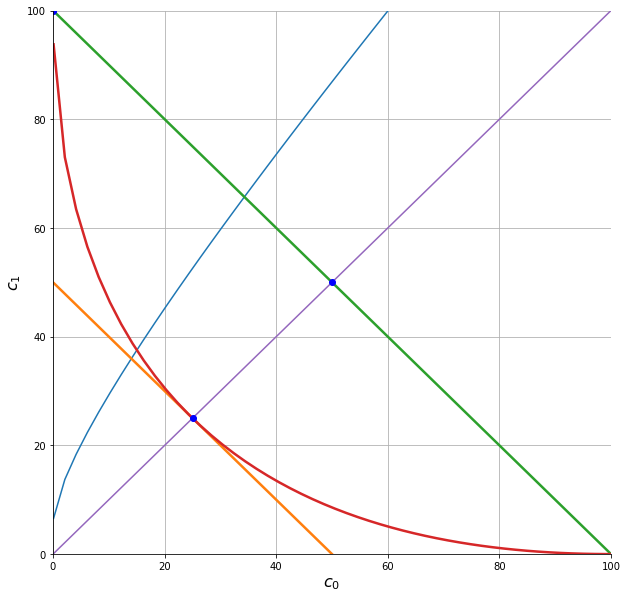

<Figure size 432x288 with 0 Axes>

In [27]:
consume_plot(p=0.5, q=0.30, B=0.9, ic=True)
plt.savefig('mhazard.png')

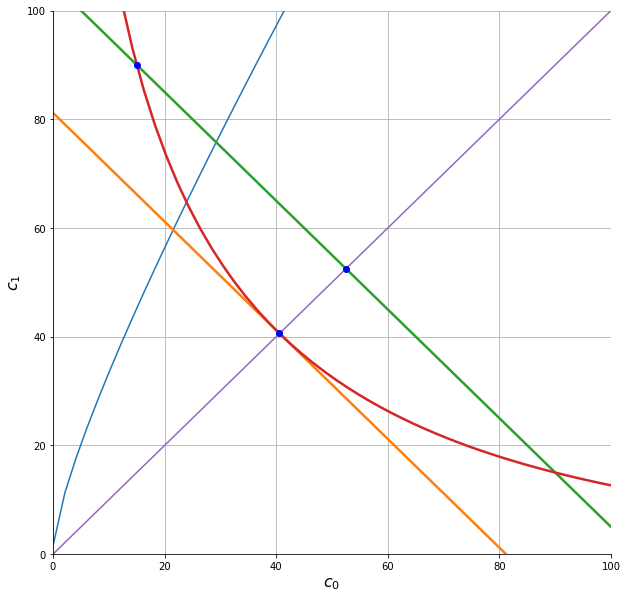

<Figure size 432x288 with 0 Axes>

In [11]:
consume_plot(p=0.5, q=0.30, B=0.5, ic=True)
plt.savefig('mhazard.png')

In [15]:
interact(consume_plot,p=fixed(0.5),q=(0.1,0.5,0.01),B=(0,3,0.1));

interactive(children=(FloatSlider(value=0.30000000000000004, description='q', max=0.5, min=0.1, step=0.01), Fl…

If we set this up and solve it as a Lagrangean (loosely following Holmstrom, 1979) we get a condition like this:

$$\frac{1}{u'(c_i)} = \lambda + \mu \cdot 
\left [ {1-\frac{f(x_i,e_L)}{f(x_i,e_H)}} \right ]  \text{ }\forall i
$$

In our two outcome case $p=f(x_1|e_H)$ and $q=f(x_1|e_L)$ and this becomes:

$$\frac{1}{u'(c_1)} = \lambda + \mu \cdot 
\left [ {1-\frac{q}{p}} \right ]  
$$

$$\frac{1}{u'(c_0)} = \lambda + \mu \cdot 
\left [ {1-\frac{1-q}{1-p}} \right ]  
$$

TODO:  
 - Functions to solve the two outcome cases (closed form possible, substitute IC into binding PC; or 2 FOC plus IC plus PC for $c_0, c_1, \lambda  \text{ and } \mu$).
 - Function to solve numerically for N outcomes (N FOCs and one participation constraint).
 - discuss how sensitive to distribution

Holmstrom's sufficient statistic

$$\frac{1}{u'(c)} = \lambda + \mu \cdot 
\left [ {1-\frac{f(x,y,e_L)}{f(x,y,e_H)}} \right ]  \text{ }\forall i
$$